# EDA for the Reddit Climate Change Dataset
by *Harsh Vardhan Pachisia*

Feb 2024

Lines of code: ~230



In [ ]:
#importing packages
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
drive.mount('/content/drive')

# Load data
data_path = "/content/drive/Shareddrives/adv-ml-project/Data/"
comments = pd.read_csv(data_path + "the-reddit-climate-change-dataset-comments.csv")
posts = pd.read_csv(data_path + "the-reddit-climate-change-dataset-posts.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA for comments


## Understand the datasets

In [ ]:
comments.describe(include='all')

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
count,4600698,4600698,4600698,4600698,4600698,4.600698e+06,4600698,4600698,4.543567e+06,4.600698e+06
unique,1,4600698,30945,30889,2,NaN,4600698,4485881,NaN,NaN
top,comment,imlddn9,2cneq,politics,False,NaN,https://old.reddit.com/r/news/comments/x2cszk/...,Climate change,NaN,NaN
freq,4600698,1,370018,370018,4585224,NaN,1,9190,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.560607e+09,NaN,NaN,-5.827452e-03,9.552084e+00
std,NaN,NaN,NaN,NaN,NaN,7.576261e+07,NaN,NaN,6.581439e-01,1.157160e+02
min,NaN,NaN,NaN,NaN,NaN,1.262306e+09,NaN,NaN,-1.000000e+00,-2.379000e+03
25%,NaN,NaN,NaN,NaN,NaN,1.518140e+09,NaN,NaN,-6.369000e-01,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.571668e+09,NaN,NaN,0.000000e+00,2.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.622571e+09,NaN,NaN,6.249000e-01,5.000000e+00


In [ ]:
comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1


In [ ]:
# number of unique ids
comments.id.nunique()

4600698

In [ ]:
# only comments are available which makes sense
comments['type'].nunique()

1

In [ ]:
# no NAs in body text- good for our purposes
comments.body.isna().sum()

0

In [ ]:
# Removing columns we don't need
columns_to_drop = ['type', 'subreddit.id', 'subreddit.nsfw', 'permalink']

# Dropping columns
comments.drop(columns_to_drop, axis=1, inplace=True)

# converting to datetime
comments['created_utc'] = pd.to_datetime(comments['created_utc'], unit='s')

In [ ]:
comments.head()

,id,subreddit.name,created_utc,body,sentiment,score
0,imlddn9,news,2022-08-31 23:59:28,Yeah but what the above commenter is saying is...,0.5719,2
1,imldbeh,ohio,2022-08-31 23:59:00,Any comparison of efficiency between solar and...,-0.9877,2
2,imldado,newzealand,2022-08-31 23:58:47,I'm honestly waiting for climate change and th...,-0.1143,1
3,imld6cb,sacramento,2022-08-31 23:57:58,Not just Sacramento. It's actually happening a...,0.0000,4
4,imld0kj,askreddit,2022-08-31 23:56:46,I think climate change tends to get some peopl...,0.6634,1


## Cleaning body column

Removing URLs, punctuation and special characters in each comment and converting them all to lowercase.

In [ ]:
# Clean the text
import re
def clean_text(text):
  '''
  Preprocessing the text by removing urls, lowercasing and removing punctuation
  and special characters
  '''
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[\.\,\'\"\!\?\:\;\-\_]', '', text)
    return text

comments['body'] = comments['body'].apply(clean_text)
comments


,id,subreddit.name,created_utc,body,sentiment,score,label,comment_length
0,imlddn9,news,2022-08-31 23:59:28,yeah but what the above commenter is saying is...,0.5719,2,1,308
1,imldbeh,ohio,2022-08-31 23:59:00,any comparison of efficiency between solar and...,-0.9877,2,-1,1509
2,imldado,newzealand,2022-08-31 23:58:47,im honestly waiting for climate change and the...,-0.1143,1,-1,362
3,imld6cb,sacramento,2022-08-31 23:57:58,not just sacramento its actually happening all...,0.0000,4,0,107
4,imld0kj,askreddit,2022-08-31 23:56:46,i think climate change tends to get some peopl...,0.6634,1,1,389
...,...,...,...,...,...,...,...,...
4600693,c0i1pd9,politics,2010-01-01 12:37:36,&gt we have no history ours goes back only 40...,-0.9849,32,-1,2331
4600694,c0i1hsb,askreddit,2010-01-01 07:05:41,changing the oil *filter* every single time yo...,0.7579,3,1,431
4600695,c0i1a0w,environment,2010-01-01 02:54:40,a man who though a moderate tory has a mixed ...,0.0242,1,0,218
4600696,c0i195b,worldnews,2010-01-01 02:30:18,both iggy and harper would have marched us int...,0.4754,0,1,216


## Plotting most frequent words


In [ ]:
from wordcloud import WordCloud

# Combine all comments into a single string
all_comments = ' '.join(comments['body'].tolist())

# Create a basic WordCloud without removing stopwords or other NLP preprocessing
basic_wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(all_comments)

# Plotting the basic WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(basic_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



### counting different subreddits
Activity in each subreddit

In [ ]:
def count_categories(categories):
  '''
  Getting the number of comments of each subreddit

  Input: subreddit name
  Output: list of tuples
  '''
    category_counts = {}
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

    return list(category_counts.items())

subreddits = count_categories(comments['subreddit.name'])

In [ ]:
subreddits

[('news', 94558),
 ('ohio', 891),
 ('newzealand', 18213),
 ('sacramento', 1161),
 ('askreddit', 259848),
 ('walkaway', 1925),
 ('pastors', 3),
 ('hudsonvalley', 23),
 ('futurology', 89945),
 ('progressive_islam', 83),
 ('collapseprep', 83),
 ('terriblefacebookmemes', 1167),
 ('socialdemocracy', 1112),
 ('portland', 5749),
 ('effectivealtruism', 621),
 ('worldnews', 351195),
 ('changemyview', 42902),
 ('tuesday', 2197),
 ('damnthatsinteresting', 8174),
 ('conspiracy', 50951),
 ('conspiracy_commons', 2252),
 ('terrifyingasfuck', 421),
 ('maine', 974),
 ('askthe_donald', 5785),
 ('civicx', 4),
 ('askwomenover30', 789),
 ('suggestmeabook', 1488),
 ('climate', 24146),
 ('urbanplanning', 1948),
 ('space', 13302),
 ('anarcho_capitalism', 6559),
 ('politicalcompassmemes', 20305),
 ('the_wild_hunt_news', 38),
 ('environment', 70444),
 ('antinatalism', 4865),
 ('asroma', 3),
 ('technology', 24145),
 ('toronto', 4069),
 ('grandrapids', 303),
 ('interestingasfuck', 17063),
 ('politics', 370018),
 

In [ ]:
#Dropping subreddits that have less than "threshold" posts- doing 3000 for now
sorted_subreddits = sorted(subreddits, key=lambda x: x[1], reverse=True)

def drop_tuples_below_threshold(tuples_list, threshold):
  '''
  removing tuples below a certain threshold
  '''
    return [t for t in tuples_list if t[1] >= threshold]

sorted_subreddits_3000 = drop_tuples_below_threshold(sorted_subreddits, 5000)
print(sorted_subreddits_3000)

[('politics', 370018), ('worldnews', 351195), ('askreddit', 259848), ('collapse', 94696), ('news', 94558), ('futurology', 89945), ('science', 71453), ('environment', 70444), ('canada', 66813), ('australia', 60239), ('conspiracy', 50951), ('unpopularopinion', 49178), ('climateskeptics', 46524), ('ukpolitics', 43179), ('changemyview', 42902), ('neoliberal', 42268), ('pics', 42233), ('europe', 37331), ('the_donald', 34106), ('canadapolitics', 31399), ('todayilearned', 30651), ('unitedkingdom', 28282), ('politicalhumor', 28203), ('bottown2', 27435), ('videos', 26813), ('politicaldiscussion', 24534), ('climate', 24146), ('technology', 24145), ('conservative', 23690), ('climatechange', 22358), ('libertarian', 21975), ('sandersforpresident', 20722), ('dataisbeautiful', 20533), ('politicalcompassmemes', 20305), ('atheism', 19640), ('australianpolitics', 19346), ('asktrumpsupporters', 18994), ('nostupidquestions', 18600), ('memes', 18217), ('newzealand', 18213), ('whitepeopletwitter', 17960), (

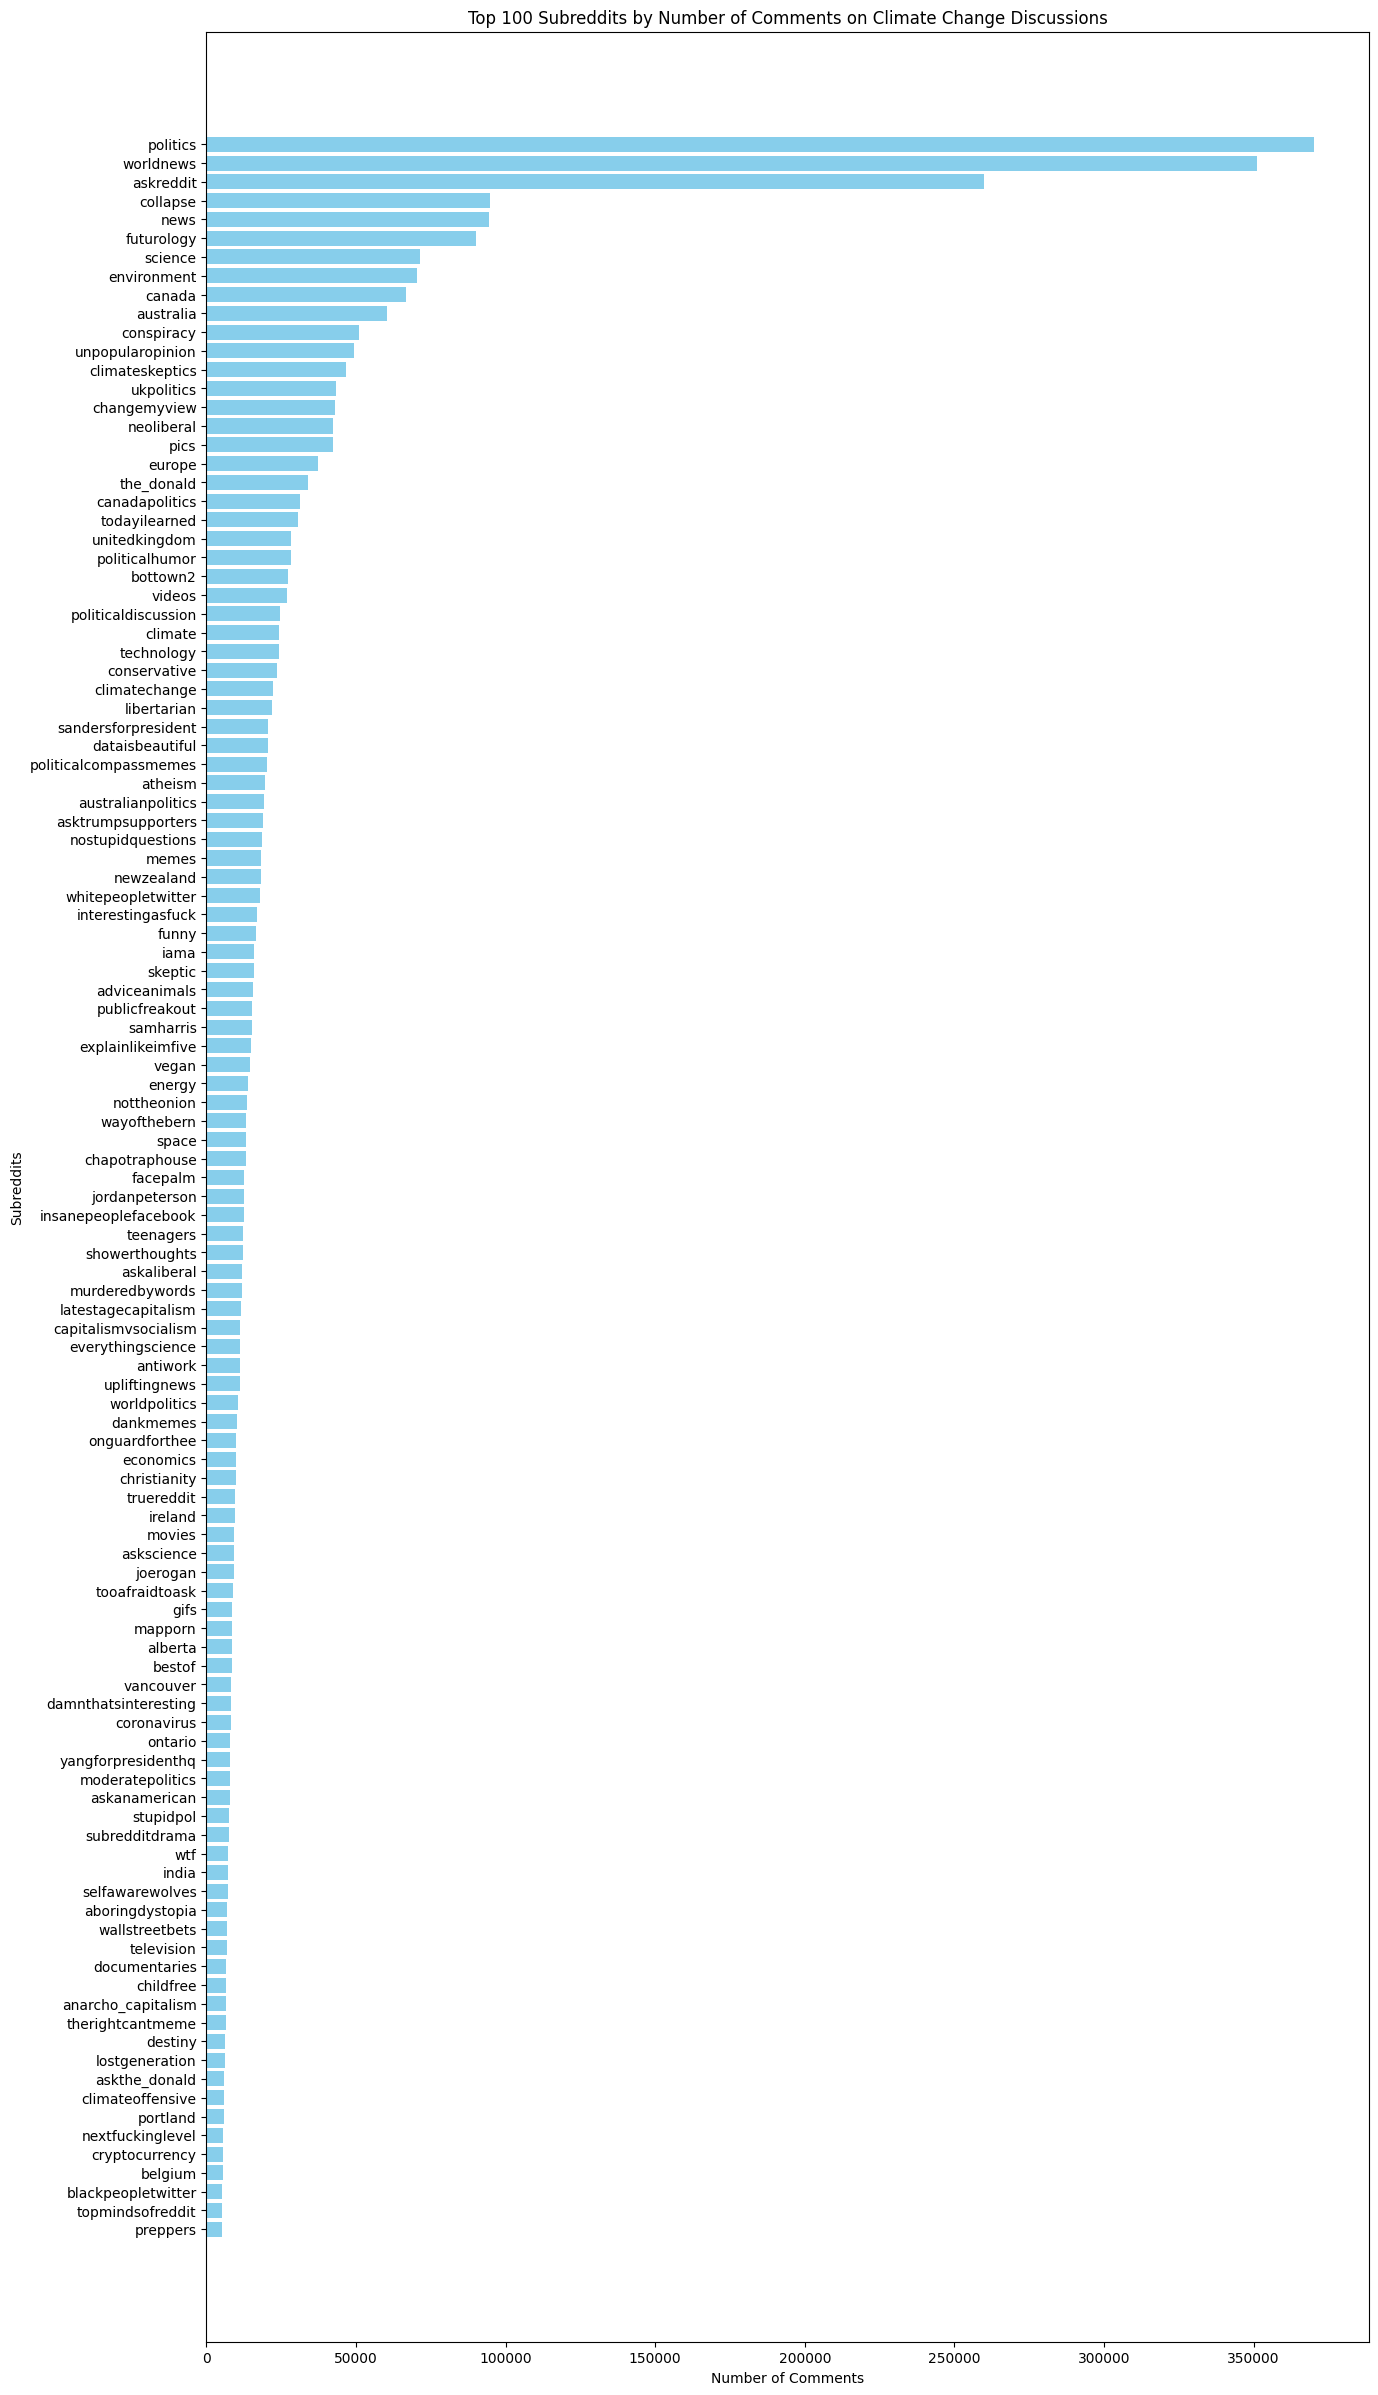

In [ ]:
sorted_subreddits_100 = sorted(
    sorted_subreddits_3000, key=lambda x: x[1], reverse=True)[:100]

# Extracting subreddits and their corresponding number of comments for the top 100
top_subreddits = [item[0] for item in sorted_subreddits_3000]
top_comments = [item[1] for item in sorted_subreddits_3000]

# Plotting the data for the top 100 subreddits
plt.figure(figsize=(15, 30))
plt.barh(top_subreddits, top_comments, color='skyblue')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddits')
plt.title('Top 100 Subreddits by Number of Comments on Climate Change Discussions')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

### No of posts per year and Yearly sentiments

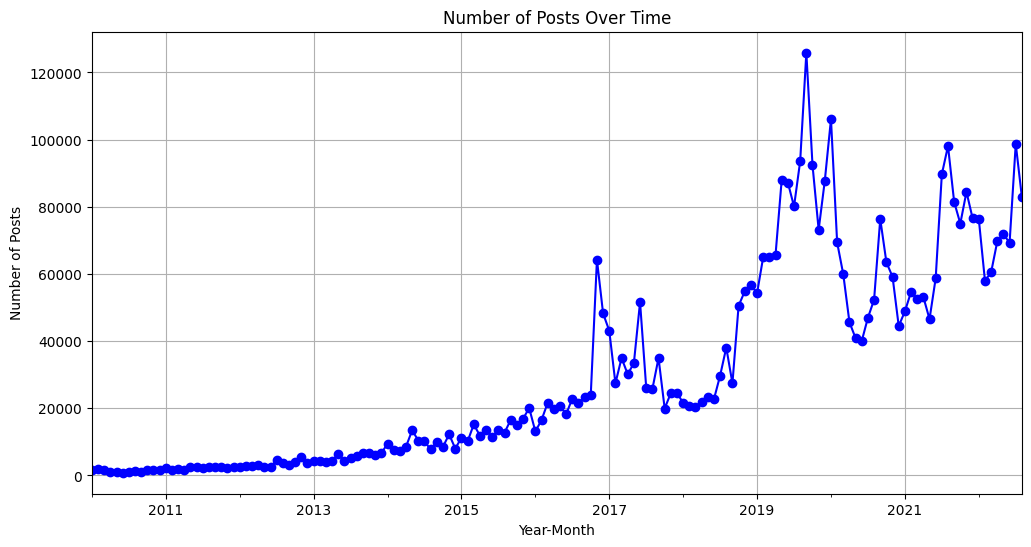

In [ ]:
# Extract year and month from the 'created_utc' column
comments['year_month'] = comments['created_utc'].dt.to_period('M')

# Count the number of posts per year-month
posts_per_year_month = comments.groupby('year_month').size()

# Plotting the number of posts over time
plt.figure(figsize=(12, 6))
posts_per_year_month.plot(kind='line', marker='o', color='b')
plt.title('Number of Posts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

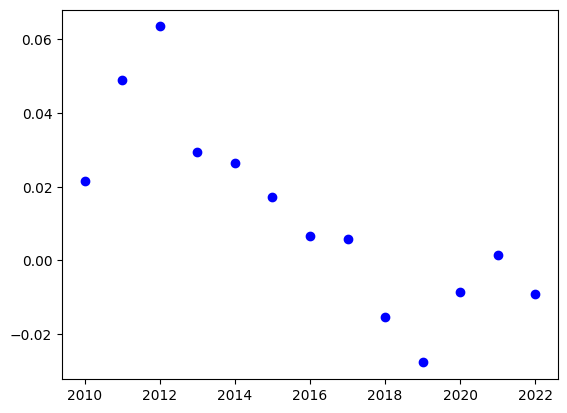

In [ ]:

yearly_sentiments = comments.groupby(pd.PeriodIndex(comments['created_utc'], freq="Y"))['sentiment'].mean()

plt.scatter(yearly_sentiments.index.to_timestamp(),yearly_sentiments,color="blue")

### Creating labels

In [ ]:
def create_label(sentiment):
  '''
  Creating a label for positive, negative and neutral sentiment
  '''
    if sentiment < -0.05:
        return -1
    elif sentiment >= -0.05 and sentiment <= 0.05:
        return 0
    else:
        return 1

In [ ]:
comments['label'] = comments['sentiment'].apply(create_label)

## length of each comment

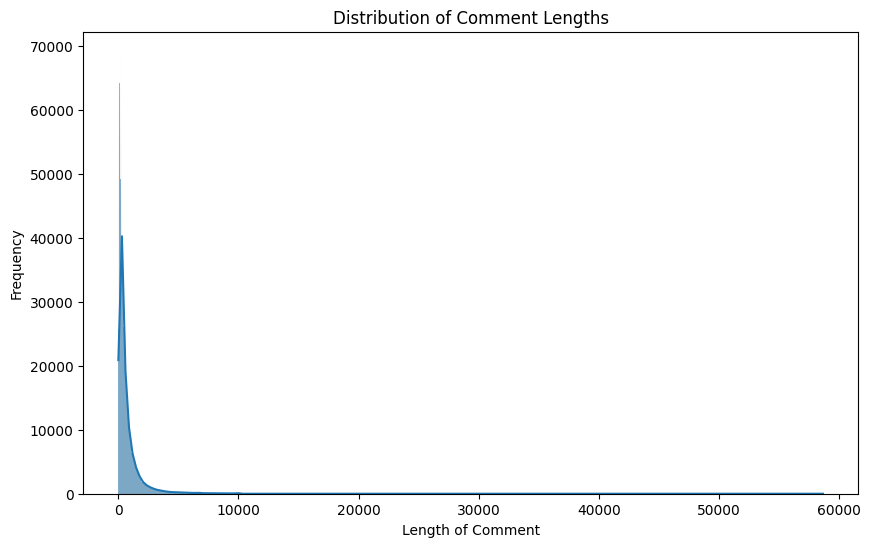

count    4.600698e+06
mean     7.233159e+02
std      1.055653e+03
min      1.400000e+01
25%      1.830000e+02
50%      3.830000e+02
75%      8.170000e+02
max      5.864300e+04
Name: comment_length, dtype: float64

In [ ]:
import seaborn as sns

# Calculate the length of each comment
comments['comment_length'] = comments['body'].apply(len)

# Plotting the distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(comments['comment_length'], kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for comment lengths
comments['comment_length'].describe()

## Posts

In [ ]:
posts.describe(include='all')

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
count,620908,620908,620908,620908,620908,6.209080e+05,620908,620908,453760,167148,620908,620908.000000
unique,1,620908,23264,23203,2,NaN,620908,28707,266619,40213,416654,NaN
top,post,x2smmw,3ib5n,ecointernet,False,NaN,https://old.reddit.com/r/DemocraticSocialism/c...,self.talkativepeople,https://worldenvironment11.blogspot.com/2021/0...,[removed],Climate Change,NaN
freq,620908,1,39994,39994,616962,NaN,1,30993,741,71799,763,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.540695e+09,NaN,NaN,NaN,NaN,NaN,81.868678
std,NaN,NaN,NaN,NaN,NaN,7.738068e+07,NaN,NaN,NaN,NaN,NaN,1411.423764
min,NaN,NaN,NaN,NaN,NaN,1.262305e+09,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.497725e+09,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.557750e+09,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,1.588650e+09,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1


In [ ]:
# Removing columns we don't need
columns_to_drop = ['type', 'subreddit.id', 'subreddit.nsfw', 'permalink', 'domain','url','score']

# Dropping columns
posts.drop(columns_to_drop, axis=1, inplace=True)

# converting to datetime
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')

In [ ]:
posts.shape

(620908, 5)

In [ ]:
# high proportion of posts have no self text
posts.selftext.isna().sum()

453760

In [ ]:
# all posts have a title- so better to focus on that
posts.title.isna().sum()

0

In [ ]:
#cleaning text of title
posts['title'] = posts['title'].apply(clean_text)
posts


,id,subreddit.name,created_utc,selftext,title
0,x2smmw,democraticsocialism,2022-08-31 23:57:17,NaN,“cities without water” is our future the leade...
1,x2slxy,nostupidquestions,2022-08-31 23:56:22,Ok so I was having a conversation with my neig...,sharks and climate change
2,x2slk5,eduwriters,2022-08-31 23:55:50,NaN,how to start a climate change essay
3,x2sbz6,alternatitvereality,2022-08-31 23:43:09,NaN,ever notice that when it’s hot a few days in j...
4,x2sa2a,askreddit,2022-08-31 23:40:40,[deleted],how would you react if the next american presi...
...,...,...,...,...,...
620903,aki85,environment,2010-01-01 12:50:33,NaN,climate change five easy new year’s resolutions
620904,akgtp,climateskeptics,2010-01-01 08:11:35,NaN,2009 climate change story of the year climate...
620905,akgkb,climateskeptics,2010-01-01 07:26:17,NaN,statistics scientific consensus on climate change
620906,akgbz,climateskeptics,2010-01-01 06:52:33,NaN,ultimate irony snowstorm squelches “screaming”...


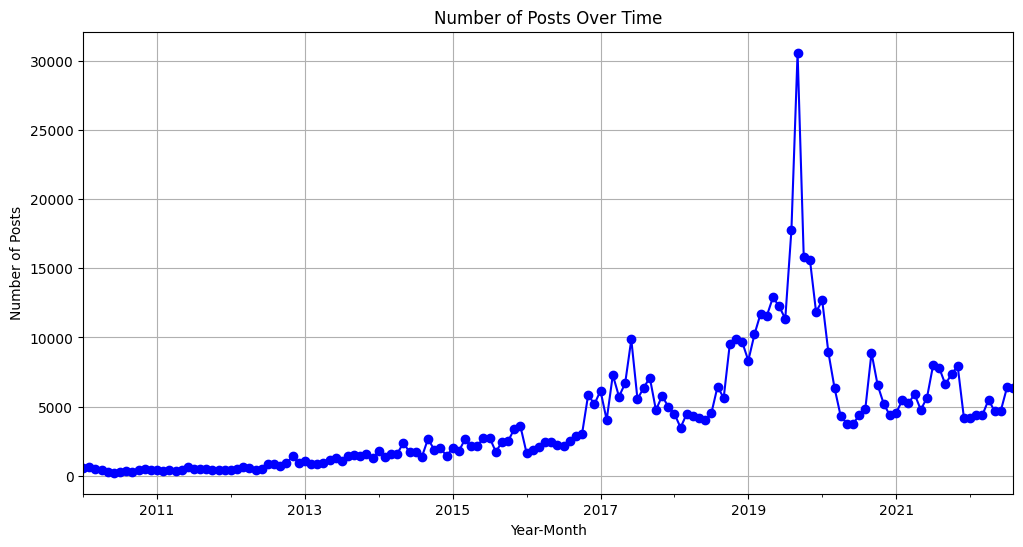

In [ ]:
posts['year_month'] = posts['created_utc'].dt.to_period('M')

# Count the number of posts per year-month
posts_per_year_month = posts.groupby('year_month').size()

# Plotting the number of posts over time
plt.figure(figsize=(12, 6))
posts_per_year_month.plot(kind='line', marker='o', color='b')
plt.title('Number of Posts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()